In [68]:
#!pip install pysd
%pylab inline
import pysd
model = pysd.read_vensim('./bass.mdl')

Populating the interactive namespace from numpy and matplotlib


In [69]:
model.doc()

,Real Name,Py Name,Unit,Lims,Type,Eqn,Comment
0,Customers,customers,b'person',"(None, None)",component,"b'INTEG(new customers,1000)'",b''
1,FINAL TIME,final_time,b'Month',"(None, None)",constant,b'100',b'The final time for the simulation.'
2,INITIAL TIME,initial_time,b'Month',"(None, None)",constant,b'0',b'The initial time for the simulation.'
3,Potential Customers,potential_customers,b'person',"(None, None)",component,"b'INTEG( - new customers,1e+006)'",b''
4,SAVEPER,saveper,b'Month',"(None, None)",component,b'TIME STEP',b'The frequency with which output is stored.'
5,TIME STEP,time_step,b'Month',"(None, None)",constant,b'1',b'The time step for the simulation.'
6,contacts of noncustomers with customers,contacts_of_noncustomers_with_customers,b'contact/Month',"(None, None)",component,b'contacts with customers*potential customer c...,b''
7,contacts with customers,contacts_with_customers,b'contact/Month',"(None, None)",component,b'Customers*sociability',b''
8,fruitfulness,fruitfulness,b'person/contact',"(None, None)",constant,b'0.01',b''
9,new customers,new_customers,b'person/Month',"(None, None)",component,b'word of mouth demand',b''


In [5]:
model = pysd.load('./bass.py')
model.run(return_columns=['potential_customers'])

,potential_customers
0.0,1000000.000000
1.0,999800.199800
2.0,999560.527377
3.0,999273.046854
4.0,998928.252103
...,...
96.0,2.391712
97.0,1.913371
98.0,1.530697
99.0,1.224558


In [6]:
values = model.run()
values.head(5)

,TIME,potential customer concentration,new customers,contacts of noncustomers with customers,contacts with customers,Customers,fruitfulness,Potential Customers,sociability,total market,word of mouth demand,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP
0.0,0.0,0.999001,199.800200,19980.019980,20000.000000,1000.000000,0.01,1000000.000000,20,1001000.0,199.800200,100,0,1,1
1.0,1.0,0.998801,239.672423,23967.242347,23996.003996,1199.800200,0.01,999800.199800,20,1001000.0,239.672423,100,0,1,1
2.0,2.0,0.998562,287.480522,28748.052237,28789.452465,1439.472623,0.01,999560.527377,20,1001000.0,287.480522,100,0,1,1
3.0,3.0,0.998275,344.794752,34479.475157,34539.062913,1726.953146,0.01,999273.046854,20,1001000.0,344.794752,100,0,1,1
4.0,4.0,0.997930,413.492009,41349.200914,41434.957944,2071.747897,0.01,998928.252103,20,1001000.0,413.492009,100,0,1,1


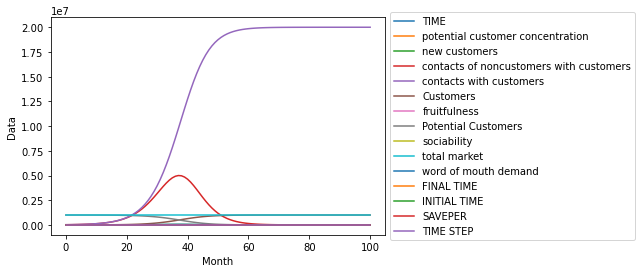

In [7]:
values.plot()
plt.ylabel('Data')
plt.xlabel('Month')
plt.legend(loc='center left', bbox_to_anchor=(1,.5));

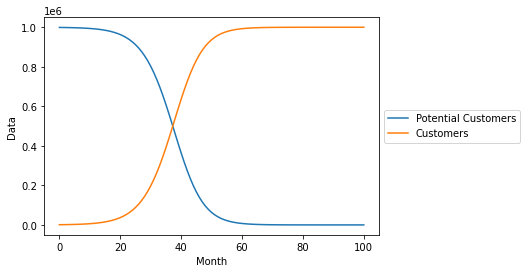

In [8]:
values = model.run(return_columns=['Potential Customers', 'Customers'])
values.plot()
plt.ylabel('Data')
plt.xlabel('Month')
plt.legend(loc='center left', bbox_to_anchor=(1,.5));

,Customers
0.0,1000.000000
1.0,1199.800200
3.0,1726.953146
7.0,3575.489045
9.5,5653.520523


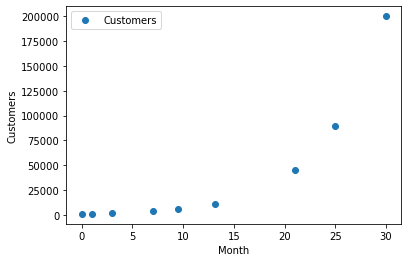

In [9]:
values = model.run(return_timestamps=[0,1,3,7,9.5,13.178,21,25,30],return_columns=['Customers'])
values.plot(linewidth=0, marker='o')
plt.ylabel('Customers')
plt.xlabel('Month')
values.head()

Text(0.5, 0, 'Minutes')

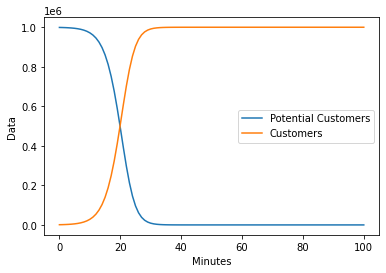

In [10]:
values = model.run(params={'sociability':40},return_columns=['Potential Customers', 'Customers'])
values.plot()
plt.ylabel('Data')
plt.xlabel('Month')

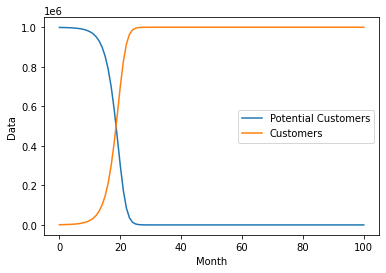

In [13]:
import pandas as pd
soc_timeseries = pd.Series(index=range(30), data=range(20,50,1))
values = model.run(params={'sociability':soc_timeseries},return_columns=['Potential Customers', 'Customers'])
values.plot()
plt.ylabel('Data')
plt.xlabel('Month');

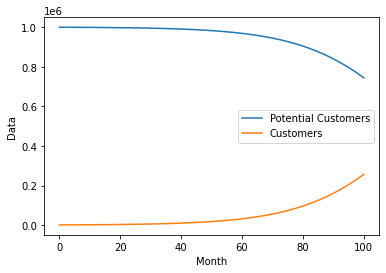

In [58]:
model = pysd.load('./bass.py')
values = model.run(params={'fruitfulness':0.002},initial_condition=(0, {'sociability':30}),return_columns=['Potential Customers', 'Customers'])
values.plot()
plt.ylabel('Data')
plt.xlabel('Month');

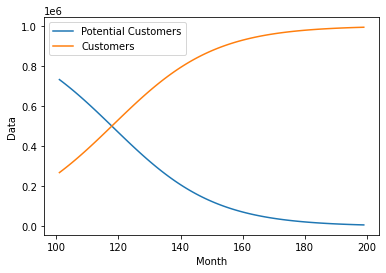

In [57]:
values = model.run(initial_condition='current',return_columns=['Potential Customers', 'Customers'],return_timestamps=list(range(101,200)))
values.plot()
plt.ylabel('Data')
plt.xlabel('Month');

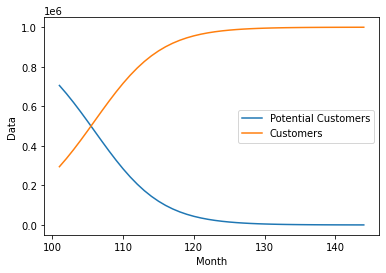

In [59]:
values = model.run(initial_condition=(100, {'sociability':100}),return_columns=['Potential Customers', 'Customers'],return_timestamps=list(range(101,145)))
values.plot()
plt.ylabel('Data')
plt.xlabel('Month');

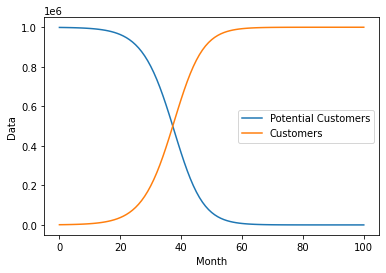

In [60]:
model = pysd.load('./bass.py')
values = model.run(initial_condition='original',return_columns=['Potential Customers', 'Customers'])
values.plot()
plt.ylabel('Data')
plt.xlabel('Month');

In [61]:
model.components.customers()

1000999.0203530686

In [66]:
model.set_components(params={'fruitfulness':0.005})
model.components.fruitfulness()

0.005

In [67]:
model.reload()
model.components.fruitfulness()

0.01